#Aula 08: Estatística descritiva 
###Análise Exploratória de Dados

#1. Gráficos, usos e códigos <br>


#####1.1. gráfico de frequência:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt 

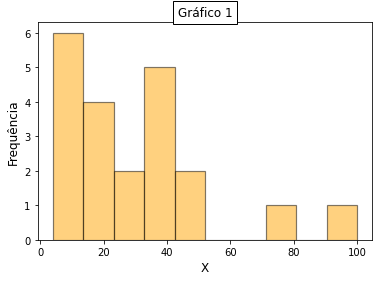

In [26]:
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]

fig= plt.figure(figsize=(6,4))

num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='orange', alpha=0.5, density=False, 
                            edgecolor='black', linewidth=1.2)
plt.title('Gráfico 1',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("X", fontsize = 12)
plt.ylabel("Frequência", fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#####1.2. histograma 

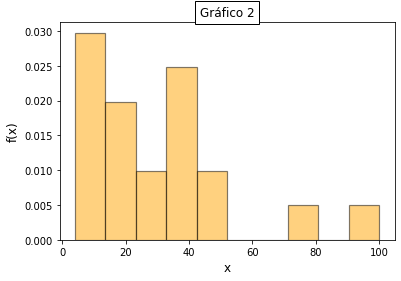

In [27]:
#histograma, a área sob a curva deve ser igual a 1 (ver a diferença na escala do eixo das ordenadas (y))
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]

fig= plt.figure(figsize=(6,4))

num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='orange', alpha=0.5, density=True, 
                            edgecolor='black', linewidth=1.2)
plt.title('Gráfico 2',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("x", fontsize = 12)
plt.ylabel("f(x)", fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#####1.3. gráfico de barra

Y: ['Bom', 'Ruim', 'Ótimo', 'Regular', 'Regular', 'Ótimo', 'Ótimo', 'Bom', 'Ótimo', 'Bom', 'Ótimo']
Valores possíveis: ['Bom' 'Regular' 'Ruim' 'Ótimo']
Frequência dos valores: [3. 2. 1. 5.]


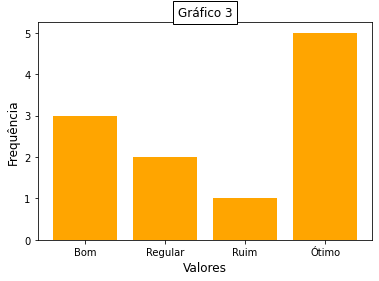

In [28]:
Y = ["Bom", "Ruim", "Ótimo", "Regular", "Regular", "Ótimo", "Ótimo","Bom", "Ótimo", "Bom", "Ótimo"]

values = np.sort(np.unique(Y)) #usamos as funções 'sort' e 'unique' do Numpy para encontrar os valores possíveis

#calculando a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequências
ind = 0 # índice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequência dos valores:', freq)

fig= plt.figure(figsize=(6,4))

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq, facecolor = 'orange')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Gráfico 3',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("Valores",fontsize = 12) 
plt.ylabel("Frequência", fontsize = 12) 
plt.show()

#####1.4. gráfico de pizza

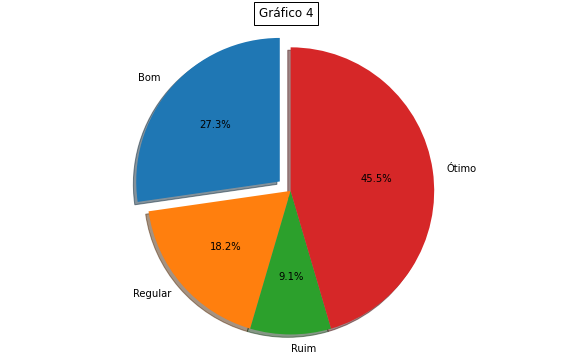

In [29]:
labels = values
sizes = freq
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,6))
plt.title('Gráfico 4',  bbox={'facecolor':'1.0', 'pad':5})
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # 'Equal aspect ratio' deixa que o gráfico seja plotado em formato de círculo
plt.show()

#####1.5. scatterplot ( usado quando queremos verificar a relação entre duas variáveis):

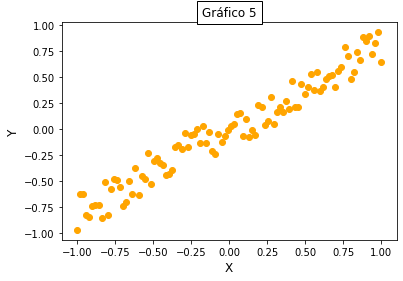

In [30]:
N = 100
X = np.linspace(-1,1, N) # gera N valores no intervalo [-1,1]
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
sigma= 0.2
Y = 0.8*X + erro*sigma

fig= plt.figure(figsize=(6,4))
plt.title('Gráfico 5',  bbox={'facecolor':'1.0', 'pad':5})
plt.scatter(X, Y, marker='o', color = 'orange');
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("X",fontsize = 12) 
plt.ylabel("Y", fontsize = 12) 
plt.show(True)

#####1.6. gráfico de calor (usado quando temos três variáveis, sendo que a escala de cores define a terceira variável):

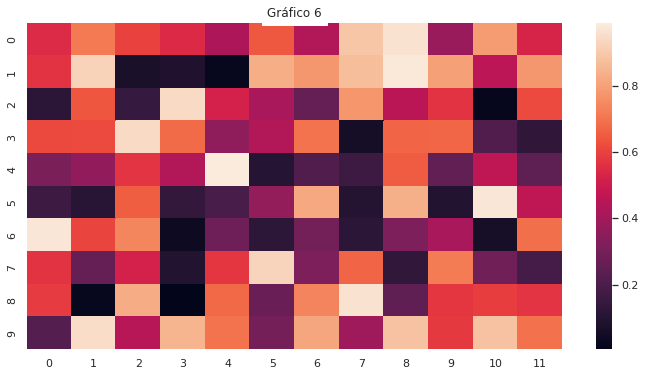

In [31]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)

plt.figure(figsize=(12,6))
plt.title('Gráfico 6',  bbox={'facecolor':'1.0', 'pad':5})
ax = sns.heatmap(uniform_data)
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights)

#2. Medidas de posição


#####2.1. Moda<br>


A `moda` retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais.<br>

* Para calcularmos a moda, usamos o pacote Statistics:

In [32]:
from statistics import mode
a = [1,2,3,1,2,3,4,1,3,6,4,1]
m = mode(a)
print("X = ", a)
print('A moda de X é', m)

X =  [1, 2, 3, 1, 2, 3, 4, 1, 3, 6, 4, 1]
A moda de X é 1


Esta biblioteca retorna um erro se houver mais de uma moda. Nesse caso, temos que implementar uma função para retornar todas as modas possíveis:

In [33]:
# b = [1,1,2,2,3,2,1,10,10,10] #neste caso, seria trimodal com 1, 2 e 10, o que daria erro
# m = mode(b)
# print("X =", b)
# print('A moda de X é:', m)

In [34]:
b = [1,1,2,2,3,2,1,10,10,10]
def new_mode(b):
    values = np.sort(np.unique(b)) 
    # vamos calcular a frequência de cada valor presente na lista
    freq = np.zeros(len(values)) # armazena as frequências
    ind = 0 # índice do vetor de frequências
    for i in values: # para os valores diferentes
        counter = 0 # conta as ocorrências
        for j in range(0,len(b)):
            if(b[j] == i):
                counter = counter + 1
        freq[ind] = counter
        ind = ind + 1
    mx = max(freq)
    md = []
    for i in range(0,len(freq)):
        if(freq[i] == mx):
            md.append(values[i])
    return md
moda = new_mode(b)
print("X =", b)
print('A moda é', moda)

X = [1, 1, 2, 2, 3, 2, 1, 10, 10, 10]
A moda é [1, 2, 10]


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X = [1, 1, 2, 2, 3, 2, 1, 10, 10, 10]
Valores possíveis: [ 1  2  3 10]
Frequência dos valores: [3. 3. 1. 3.]


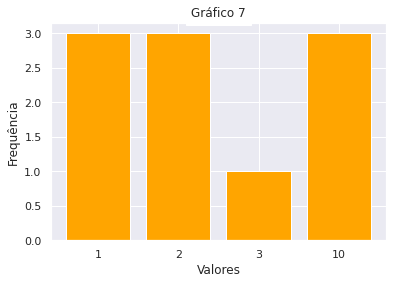

In [35]:
# Usamos a funções sort e unique do Numpy para encontrar os valores possíveis em ordem crescente.
# esses valores serão mostrados no eixo horizontal do gráfico.
values = np.sort(np.unique(b)) 

# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequências
ind = 0 # índice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(b)):
        if(b[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X =',b)
print('Valores possíveis:', values)
print('Frequência dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq, facecolor = 'orange')
plt.title('Gráfico 7',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("Valores",fontsize = 12) 
plt.ylabel("Frequência", fontsize = 12) 


plt.show()

Podemos aplicar a função em dados nominais:

In [36]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y é', mode(Y))

A moda de Y é red


O gráfico de barras mostrando a frequência:

Y = ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequência dos valores: [2. 1. 4.]


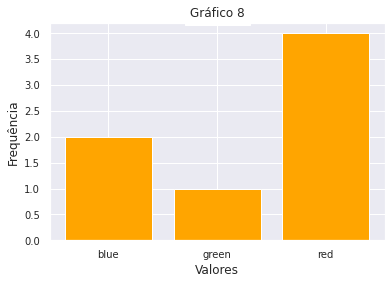

In [37]:
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.

# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # índice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y =', Y)
print('Valores possíveis:', values)
print('Frequência dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq, facecolor = 'orange')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Gráfico 8',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("Valores", fontsize = 12) 
plt.ylabel("Frequência", fontsize = 12) 
plt.show()

Ou ainda em um gráfico de pizza:

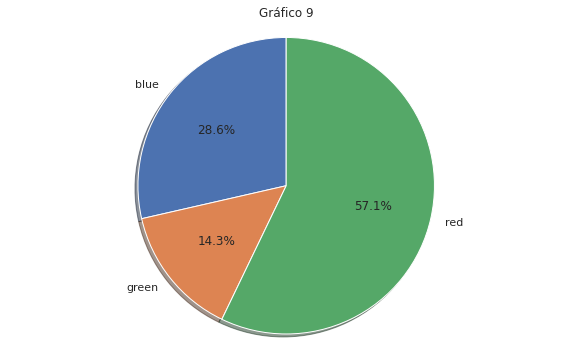

In [38]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(freq, explode=(0, 0, 0), labels=values, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # 'Equal aspect ratio' deixa que o gráfico seja plotado em formato de círculo
plt.title('Gráfico 9',  bbox={'facecolor':'1.0', 'pad':5})
plt.show()

#####2.2. Média e mediana


`Mediana` é o valor que ocupa a posição central do conjunto de dados, enquanto a `média` é a soma de todos os elementos dividido pela quantidade de elementos do conjunto.

In [45]:
import numpy as np 
c = [1,1,1,2,2,3,4,5,5,5]
mx = np.mean(c)
print('X =', c)
print('A média é', mx)

X = [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A média é 2.9


In [46]:
md = np.median(c)
print('X =', c)
print('A mediana é', md)

X = [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A mediana é 2.5


Se adicionarmos um valor extremo aos dados, vejamos como a média e a mediana se comportam:

In [47]:
c2 = [1,1,1,2,2,3,4,5,5,1000]
print('X2 =', c2)
print('A nova média é:', np.mean(c2))
print('A nova mediana é:', np.median(c2))

X2 = [1, 1, 1, 2, 2, 3, 4, 5, 5, 1000]
A nova média é: 102.4
A nova mediana é: 2.5


Com isso, vemos que a média é altamente sensível a valores extremos, enquanto que a mediana é mais robusta. <br>

Vamos considerar uma distribuição de probabilidades. Os dados são gerados a partir de distribuições normal e exponencial. 
* Para a distribuição normal, a média é indicada pela linha contínua e a mediana, pela tracejada.

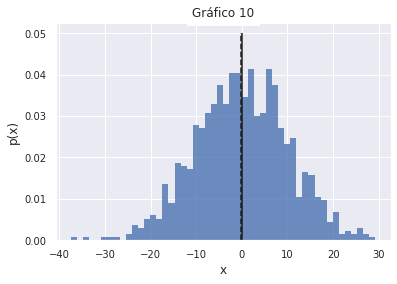

In [50]:
mu = 0 # Média da distribuição normal
sigma = 10 #desvio padrão da distribuição normal
Y = np.random.normal(mu, sigma, 1000)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y) #média de Y
md = np.median(Y) #mediana de Y
plt.vlines(m,0,0.05)
plt.vlines(md,0,0.05, linestyles = 'dashed')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Gráfico 10',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("x",fontsize = 12) 
plt.ylabel("p(x)", fontsize = 12) 
plt.show(True)

* Para a distribuição exponencial, a média é indicada pela linha contínua e a mediana pela tracejada.

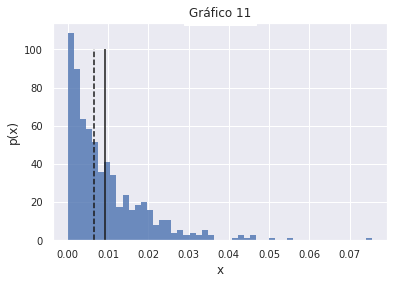

In [51]:
lbda = 100 # taxa da distribuição exponencial
beta = 1.0/lbda

Y = np.random.exponential(beta, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Gráfico 11',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel("x",fontsize = 12) 
plt.ylabel("p(x)", fontsize = 12) 

plt.show(True)

Notamos que a média é similar à mediana se a distribuição é praticamente simétrica em relação à média. Caso a distribuição não seja simétrica, o mais adequado é usar a mediana como medida central.

#####2.3. Quartis

Com o uso do `boxplot`, avaliamos e comparamos o formato, tendência central e variabilidade de distribuições de amostra. Por padrão, um boxplot demonstra a mediana, os quartis, o intervalo interquartil(IQR) e as anomalias (outliers) representadas pelos valores máximos e mínimos de cada variável.

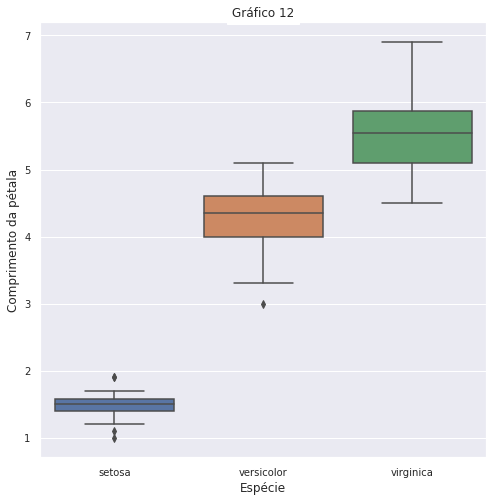

In [53]:
data = pd.read_csv('/aula 08 - iris.csv', header=(0)) #fazer upload do arquivo "aula 08 - iris.csv"
plt.figure(figsize=(8, 8))

# mostra o boxplot
sns.boxplot(x="species", y="petal_length", data=data)
plt.title('Gráfico 12',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlabel('Espécie', fontsize=12)
plt.ylabel('Comprimento da pétala', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show(True)

#3. Medidas de dispersão<br>


As medidas de dispersão mais usadas são a variância e o desvio padrão. A `variância` mostra o quão distante cada valor de um conjunto está do valor central (médio). Com isso, quanto menor é a variância, mais próximos os valores estão da média, mas quanto maior é a variância, mais os valores estão distantes da média.<br>
Já o `desvio padrão` indica quão uniforme está o conjunto estudado. Se o valor do desvio padrão é alto, o conjunto de dados está mais distante da média e, quanto mais próximo de 0 ele estiver, temos o desvio padrão mais homogêneo.<br>
 O `intervalo interquartil (IQR)` também é bastante usado e quantifica a diferença entre o terceiro e primeiro quartil do conjunto. <br>
 Por fim, a `amplitude` mede a diferença entre os valores máximo e mínimo do intervalo.

In [63]:
from scipy.stats import iqr

def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

X = [0,0,1,1,18]
Y = [4, 4, 4, 4, 4]
mx = np.mean(X)
my = np.mean(Y)
print('X:', X)
print('Média de X:', mx)
print('Variância de X:', variancia(X))
print('IQR de X:', iqr(X))
print('Amplitude de X:', np.max(X)-np.min(X))

print('\n')
print('Y:', Y)
print('Média de Y:', my)
print('Variância de Y:', variancia(Y))
print('IQR de Y:', iqr(Y))
print('Amplitude de Y:', np.max(Y)-np.min(Y))

X: [0, 0, 1, 1, 18]
Média de X: 4.0
Variância de X: 61.5
IQR de X: 1.0
Amplitude de X: 18


Y: [4, 4, 4, 4, 4]
Média de Y: 4.0
Variância de Y: 0.0
IQR de Y: 0.0
Amplitude de Y: 0


Notamos que os dados acima possuem a mesma média, mas a variância é bastante diferente.

#####Resumo descritivo das medidas estatística dos dados:

In [54]:
data = pd.read_csv('/aula 08 - iris.csv', header=(0)) # lê os dados a partir do arquivo Iris
data.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Exercícios<br>


1. Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


X = [11 13  6 10  7 12  8 13 11  8  9 12  9 13  5  7 14 10  8  6 10  7  6  6
  9  9  5  7 11 14 10  9 15 12 12  9 12 19  7 17 11  8 12 13 12  9  5 11
  6  6 12 12 10  3 11 11  3  9 10 17  9 11  9 10 11 13  8 12 10  8 11  7
 15 20  8 13 11  4 15 10 13 13 15 10 10  7  8 11 13 11 13 12  7 10 10 11
 11  5  9  6]
A média é 10.09
A mediana é 10.0


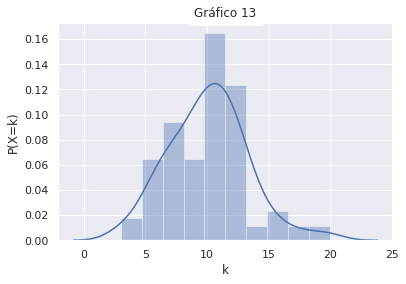

In [58]:
from scipy.stats import poisson #gera números aleatórios
dados_poisson = poisson.rvs(mu=10, size = 100)

sns.distplot(dados_poisson)
plt.title('Gráfico 13',  bbox={'facecolor':'1.0', 'pad':5})
plt.xlim()
plt.xlabel('k')
plt.ylabel('P(X=k)')


d = dados_poisson
mx = np.mean(d)
print('X =', d)
print('A média é', mx)

md = np.median(d)
print('A mediana é', md)

2. Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.


In [59]:
print("Médias =\n", data.mean(),"\n")

print("Variâncias =\n", data.var(),"\n")

iqr = data.quantile(.75) - data.quantile(.25)
print("IQR =\n", iqr) 

Médias =
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64 

Variâncias =
 sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64 

IQR =
 sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


3. Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

In [60]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


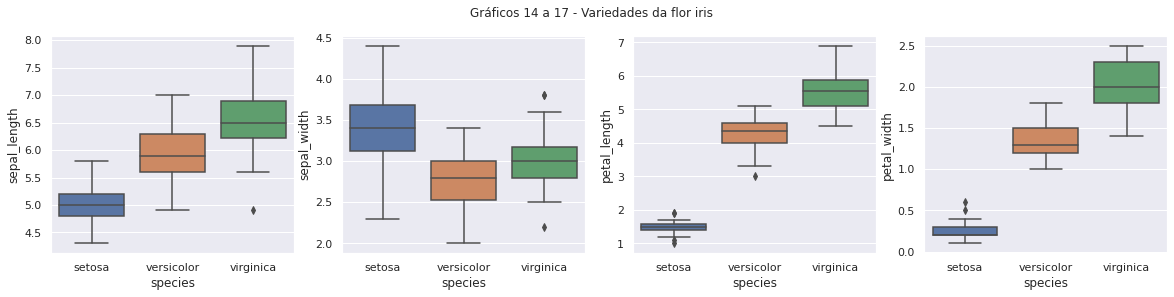

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle('Gráficos 14 a 17 - Variedades da flor iris',fontsize=12)
sns.boxplot(ax=axes[0], x=data["species"], y="sepal_length", data=data)

sns.boxplot(ax=axes[1], x=data["species"], y="sepal_width", data=data)

sns.boxplot(ax=axes[2], x=data["species"], y="petal_length", data=data)

sns.boxplot(ax=axes[3], x=data["species"], y="petal_width", data=data)
